<a href="https://colab.research.google.com/github/MatinMashhadiabbsiprogramming/Google_Colab/blob/main/Dve_Medel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# read data for pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer 

# housing = pd.read_csv('/content/drive/MyDrive/Colab_Files/DataSet/housing.csv',sep=',')
housing = pd.read_csv('../vision/housing.csv',sep=',')
# housing.info()
housing.columns # return head table
# housing['name table'].unique() # return detil of table /
# filter table
# housing[housing['']==[]]
# housing['population'][housing['ocean_proximity']=='ISLAND']

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [2]:
# tiran & a test
Train_data_model,Test_data_model = train_test_split(housing,test_size=0.2,random_state=42)


<Axes: xlabel='longitude', ylabel='latitude'>

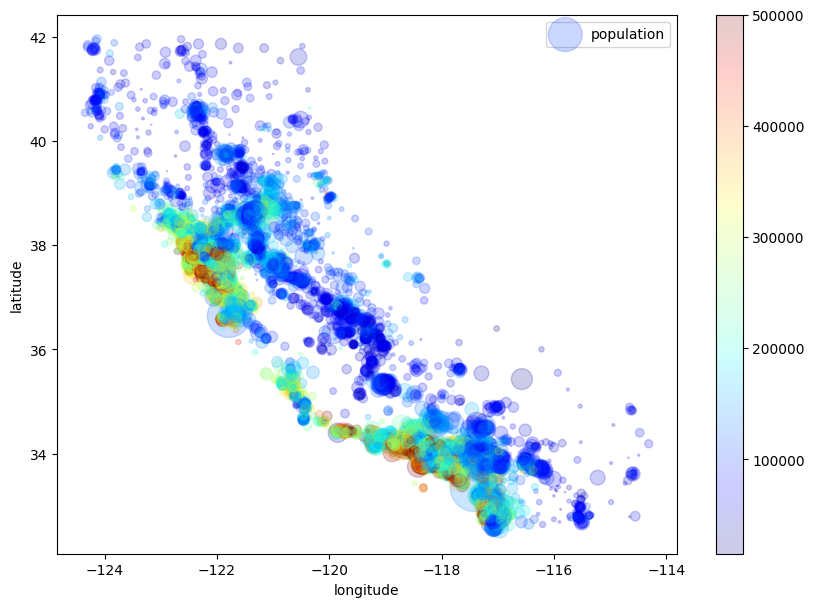

In [3]:
data=Train_data_model.copy()
data.plot(kind="scatter",x="longitude",y="latitude",
          s=data["population"]/30,label="population",
          c=data["median_house_value"],cmap=plt.get_cmap("jet"),
          figsize=(10,7),alpha=0.2)


In [4]:
data.drop('ocean_proximity', axis=1, inplace=True)

In [5]:
# standard correlation coefficient
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

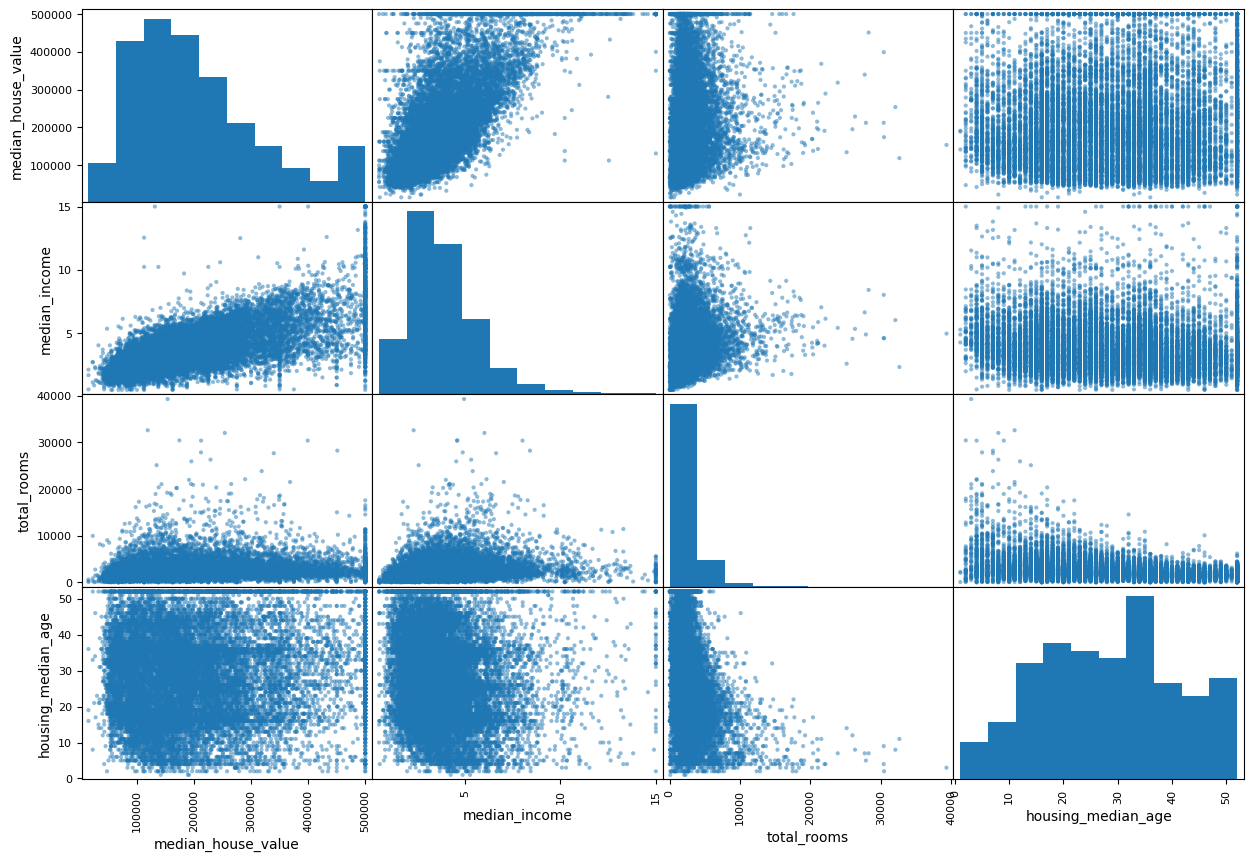

In [6]:
features = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[features],figsize=(15,10))
plt.show()

In [7]:
data['total_rooms_per_households'] = data['total_rooms']/data['households']
data['total_bedrooms_per_tutal_rooms'] = data['total_bedrooms']/data['households']
data['population_per_households'] = data['population']/data['households']
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_tutal_rooms,population_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,5.017657,1.006421,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.473545,1.041005,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.985119,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.002817,1.033803,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,6.268421,1.134211,2.300000


In [8]:
# data['ocean_proximity'].delet()
# data.drop('ocean_proximity', axis=1, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,total_rooms_per_households,total_bedrooms_per_tutal_rooms,population_per_households
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,5.017657,1.006421,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,4.473545,1.041005,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,5.645833,0.985119,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,4.002817,1.033803,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,6.268421,1.134211,2.300000


In [9]:
corr_matrix=data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value                1.000000
median_income                     0.690647
total_rooms_per_households        0.158485
total_rooms                       0.133989
housing_median_age                0.103706
households                        0.063714
total_bedrooms                    0.047980
population_per_households        -0.022030
population                       -0.026032
longitude                        -0.046349
total_bedrooms_per_tutal_rooms   -0.051351
latitude                         -0.142983
Name: median_house_value, dtype: float64

## Perpare data

In [10]:
# deleted columns median_house_value
df=Train_data_model.copy()
df_label=df['median_house_value'].copy()
df=df.drop('median_house_value',axis=1)

In [11]:
# missing values is ok
df_num = df.drop('ocean_proximity',axis=1)
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(df_num)
X = imputer.transform(df_num)
df_num_impute_tr = pd.DataFrame(X,columns=df_num.columns)
df_num_impute_tr.info()
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total

## Custom transformers


In [12]:

rooms_ix,bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder():
    def fit(self, X , y=None):
      return self
    def transform(self, X, y=None):
      rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
      population_per_household = X[:,population_ix] / X[:,household_ix]
      bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]


# object
custom = CombinedAttributesAdder()
data_custom_tr_tmp = custom.transform(df_num_impute_tr.values) # return arr
data_custom_tr = pd.DataFrame(data_custom_tr_tmp) # convert array to dataframe
columns = list(df_num_impute_tr.columns)
columns.append('rooms_per_household')
columns.append('population_per_household')
columns.append('bedrooms_per_room')
data_custom_tr.columns = columns
data_custom_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,5.017657,3.691814,0.200576
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,4.473545,1.738095,0.232703
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,5.645833,2.723214,0.174486
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,4.002817,3.994366,0.258269
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,6.268421,2.300000,0.180940


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# object
feature_scaler=StandardScaler()
data_num_scaled = pd.DataFrame(feature_scaler.fit_transform(data_custom_tr.values),columns=data_custom_tr.columns)
data_num_scaled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364


## Categorical & Text data


In [14]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data_cat = df["ocean_proximity"]
data_cat_encoded = encoder.fit_transform(data_cat)
data_cat_encoded = pd.DataFrame(data_cat_encoded,columns=['proximity'])
data_cat_encoded.head()

,proximity
0,4
1,4
2,4
3,4
4,1


In [15]:
# OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing.OneHotEncoder import ge


encoder_1hot = OneHotEncoder(sparse_output=False)
data_cat_1hot_tmp = encoder_1hot.fit_transform(df[['ocean_proximity']])
data_cat_1hot = pd.DataFrame(data_cat_1hot_tmp)

data_cat_1hot.columns = encoder_1hot.get_feature_names_out(['ocean_proximity'])
data_cat_1hot.columns = data_cat_1hot.columns.str.replace('ocean_proximity','prox')

data_cat_1hot.head()

# merging numeric data with text 

final = pd.concat([data_num_scaled,data_cat_1hot],axis=1)
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [16]:
# use pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.pipeline import FeatureUnion

rooms_ix,bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def fit(self, X , y=None):
              return self
        def transform(self, X, y=None):
              rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
              population_per_household = X[:,population_ix] / X[:,household_ix]
              bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
              return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

# split numeric & txt columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
        def __init__(self, attribute_names):
            self.attribute_names = attribute_names  
        def fit(self, X , y=None):
            return self 
        def transform(self, X):
            return X[self.attribute_names].values 
            
df = Train_data_model.copy()
df_label = df['median_house_value'].copy()
df = df.drop('median_house_value',axis = 1 )

df_num = df.drop(['ocean_proximity'],axis=1) # just numeric columns
num_attrs = list(df_num) 
cat_attrs = ['ocean_proximity']

# pipline num
num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attrs)),
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

# pipline Categorical & Text data
cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attrs)),
    ('one_hot_encoder',OneHotEncoder(sparse_output=False)),
])

# merge numeric & txt columns
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

# object 
housing_prepared = full_pipeline.fit_transform(df)
housing_prepared_df = pd.DataFrame(housing_prepared, columns =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'population_per_household', 'bedrooms_per_room',
       'prox_<1H OCEAN', 'prox_INLAND','prox_ISLAND', 'prox_NEAR BAY','prox_NEAR OCEAN'])
       
      
housing_prepared_df.head()
# type(housing_prepared)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [17]:
final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,population_per_household,bedrooms_per_room,prox_<1H OCEAN,prox_INLAND,prox_ISLAND,prox_NEAR BAY,prox_NEAR OCEAN
0,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,0.051376,-0.211785,0.0,0.0,0.0,0.0,1.0
1,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,-0.117362,0.342185,0.0,0.0,0.0,0.0,1.0
2,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.032280,-0.661658,0.0,0.0,0.0,0.0,1.0
3,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.077507,0.783032,0.0,0.0,0.0,0.0,1.0
4,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.068832,-0.550364,0.0,1.0,0.0,0.0,0.0


In [18]:
# use algorithm Linear_Regression 
from sklearn.linear_model import LinearRegression 

# create object & train model 
Linear_Object = LinearRegression() # object Linear
Linear_Object.fit(housing_prepared_df,df_label) # training model 


LinearRegression()

In [19]:
# test & result model 
sample_data_prepared = housing_prepared_df.iloc[:5]
print(f"Predictions is : {Linear_Object.predict(sample_data_prepared)}")

sample_labels = df_label.iloc[:5]
# sample_labels2 =list(df_label.iloc[:5])
print(f"Data Labels is : {list(sample_labels)}")
# print(f"Data Labels is : {sample_labels2}")
print("\n\n")
print(type(sample_data_prepared),type(sample_labels))

Predictions is : [181746.54359616 290558.74973505 244957.50017771 146498.51061398
 163230.42393939]
Data Labels is : [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]



<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [20]:
from sklearn.metrics import mean_squared_error 

# RMSE ==> Root Mean Squared Error 
housing_predictions = Linear_Object.predict(housing_prepared_df)
lin_mse = mean_squared_error(df_label, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
# res ==> 67593.20745775253

67593.20745775253

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared_df,df_label)
housing_predictions = tree_reg.predict(housing_prepared_df)
tree_mse = mean_squared_error(df_label, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [22]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score (tree_reg, housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
trees_rmse_scores = np.sqrt(-scores)

def display_Scores(scores,model_name):
    print(model_name)  
    print("Scores:",scores) # print cv data 
    print('Mean:',scores.mean()) # print median 
    print("Standard deviation:",scores.std()) # print Standard devishon

display_Scores(trees_rmse_scores,"decision Tree Regression ")
print(type(trees_rmse_scores))

decision Tree Regression 
Scores: [65467.39189001 69832.97785552 68896.64763282 68671.50111372
 74418.18249871 66544.69896932 66371.32570976 67818.49739038
 66745.28917862 70380.90574984]
Mean: 68514.741798869
Standard deviation: 2482.3116935267562
<class 'numpy.ndarray'>


In [23]:
lin_scores = cross_val_score (Linear_Object, housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_Scores(lin_rmse_scores,"linear Regression ")

linear Regression 
Scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Mean: 67828.38677377408
Standard deviation: 2468.091395065229


In [24]:
from sklearn.ensemble import RandomForestRegressor

forEst_reg = RandomForestRegressor()
forEst_reg.fit(housing_prepared_df,df_label)
forEst_Scores = cross_val_score(forEst_reg,housing_prepared_df,df_label,scoring='neg_mean_squared_error',cv=10)
forEst_rmse_Scores = np.sqrt(-forEst_Scores)
display_Scores(forEst_rmse_Scores,'Random Forest regression')

Random Forest regression
Scores: [47256.71961629 51909.38852089 49976.65699154 51700.58361536
 52659.77940316 47300.27806817 47720.24699501 50897.72710384
 49083.84250613 50181.53780299]
Mean: 49868.67606233707
Standard deviation: 1874.295461690489


In [25]:
#  result Roandom forest : 
'''
Random Forest regression
Scores: [46985.89277905 51838.21423642 49735.18593687 52284.65134558
 52623.40866398 47038.04113761 47560.65495159 50722.84869844
 49526.93004319 50031.28252506]
Mean: 49834.711031779436
'''


'\nRandom Forest regression\nScores: [46985.89277905 51838.21423642 49735.18593687 52284.65134558\n 52623.40866398 47038.04113761 47560.65495159 50722.84869844\n 49526.93004319 50031.28252506]\nMean: 49834.711031779436\n'

In [29]:
#  test  1 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_input = [{'n_estimators':[3, 4, 6, 10, 30], 'max_features':[2, 6, 8, 15]}]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_input, cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared_df,df_label)

print('Best Parameters: ',grid_search.best_params_)
print('Best Estimator: ',grid_search.best_estimator_)


Best Parameters:  {'max_features': 6, 'n_estimators': 30}
Best Estimator:  RandomForestRegressor(max_features=6, n_estimators=30)


In [30]:
# find combining all param  

result = grid_search.cv_results_
for mean_score, params in zip(result['mean_test_score'],result['params']):
    print(np.sqrt(-mean_score),params)


63218.501739086045 {'max_features': 2, 'n_estimators': 3}
59780.92803356142 {'max_features': 2, 'n_estimators': 4}
58407.72298960135 {'max_features': 2, 'n_estimators': 6}
55070.991637234976 {'max_features': 2, 'n_estimators': 10}
52539.51387241943 {'max_features': 2, 'n_estimators': 30}
58645.63362785037 {'max_features': 6, 'n_estimators': 3}
57086.28647899343 {'max_features': 6, 'n_estimators': 4}
54361.30062136836 {'max_features': 6, 'n_estimators': 6}
52216.03746966316 {'max_features': 6, 'n_estimators': 10}
49875.512216289615 {'max_features': 6, 'n_estimators': 30}
59019.98729089905 {'max_features': 8, 'n_estimators': 3}
56125.7840581893 {'max_features': 8, 'n_estimators': 4}
54583.109845170846 {'max_features': 8, 'n_estimators': 6}
51635.19780950474 {'max_features': 8, 'n_estimators': 10}
49929.40792833153 {'max_features': 8, 'n_estimators': 30}
59162.15623145515 {'max_features': 15, 'n_estimators': 3}
56946.46612271611 {'max_features': 15, 'n_estimators': 4}
54867.439374469854 {

In [31]:
# Test model on the test set 
final_model = grid_search.best_estimator_
X = Test_data_model.drop('median_house_value',axis=1)
y = Test_data_model['median_house_value'].copy()

X_prepared = full_pipeline.transform(X)
final_predictions = final_model.predict(X_prepared)
final_mse = mean_squared_error(y,final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse


C:\Users\Matin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


49679.495566845755

In [ ]:
# test 2 : 49931.78793727492
# test 3 : 49679.495566845755